In [1]:
import numpy as np
import pandas as pd
import sys, os, time
main_folder = './../'
if main_folder not in sys.path:
    sys.path.append(main_folder)
from evolution import DifferentialEvolution
from glob       import glob
from tqdm       import tqdm

import dirs
from utils      import get_solution, ProgressBar, write_log
import matplotlib.pyplot as plt 

progbar = ProgressBar(elapsed_time=True)

### Parameters

In [2]:
# Competition Parameters
funcId      = 1
dim         = 10
numRuns     = 2
targetError = 1e-8

# Algorithm Parameters
pop_size = 300
percMaxEvals = 1
maxEvals = 'auto'
maxGenerations = None
fitness_clusters = None
crossover = 'binonial'
mutation = 'best'
n_diff = 1
lambda_mutation = .5
opposition = False
input_data_filepath = './../input_data'
active = False

In [3]:
# Parameters
algorithm = "de"
mutation = "best"
n_diff = 1
crossover = "bin"
funcId = 9
dim = 10
numRuns = 51
pop_size = 300
percMaxEvals = 0.6
lambda_mutation = 0.5
opposition = False
fitness_clusters = None
input_data_filepath = "./input_data"
active = True


In [4]:
maxEvals = maxEvals if percMaxEvals is None else percMaxEvals*10000*dim
run_tag = '[' + '_'.join([str(funcId), 
                          str(dim), 
                          str(numRuns),
                          str(pop_size), 
                          str(percMaxEvals),                                                     
                          '{}'.format(lambda_mutation), 
                          str(opposition),
                          str(fitness_clusters)
                         ])  + ']'
run_tag

'[9_10_51_300_0.6_0.5_False_None]'

In [5]:
alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)

output_filepath = os.path.join(dirs.results, str(alg))
if not os.path.exists(output_filepath):
    os.makedirs(output_filepath)
output_filepath = output_filepath + '/' + run_tag

print ('Writing log at ', output_filepath + 'log.tsv')
write_log(filepath=output_filepath + 'log.tsv', 
          mode="w+", 
          text='[{}]\trun\telapsedTime\tsuccessRate\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime())))  

Writing log at 

./results/DE/best/1/bin/[9_10_51_300_0.6_0.5_False_None]log.tsv

In [6]:
hist = pd.DataFrame()
arr_runs = range(numRuns)
solution = get_solution(funcId, dim, input_data_filepath=input_data_filepath)
successRate = 0
for idx_run in arr_runs:
    progbar.update_progress(idx_run/float(len(arr_runs)))
    
    # Differential Evolution
    alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)
    
    errorHist, fitnessHist = alg.optimize(target=solution, max_f_evals=maxEvals, target_error=targetError, verbose=True)        
    bestError = errorHist.iloc[-1,:].min()
    errorHist["run"] = np.ones(errorHist.shape[0], dtype=int)*idx_run
    hist = pd.concat([hist, errorHist], ignore_index=False)    
    if bestError <= targetError:
        print ("Target error achieved with error {}".format(bestError))
        successRate += 1
    
    write_log(filepath=output_filepath + 'log.tsv', 
              text='[{}]\t{}/{}\t{}\t{}\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime()), 
                                              idx_run+1,
                                              len(arr_runs),
                                              progbar.get_elapsed_time(),
                                              successRate)
             )
    
hist.index.name = 'generation'
hist.to_csv(output_filepath + 'hist.tsv', sep='\t')
progbar.update_progress(1)

[0:00:00][----------] 0.00% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	967.5873

Best Fitness:	940.5420
Solution:	900.0000
Diff:		40.5420

[0:07:48][----------] 1.96% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	968.3469

Best Fitness:	939.3139
Solution:	900.0000
Diff:		39.3139

[0:14:48][----------] 3.92% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	963.1211

Best Fitness:	934.5827
Solution:	900.0000
Diff:		34.5827

[0:21:54][#---------] 5.88% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	963.1399

Best Fitness:	928.7931
Solution:	900.0000
Diff:		28.7931

[0:28:34][#---------] 7.84% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	968.6135

Best Fitness:	936.3296
Solution:	900.0000
Diff:		36.3296

[0:35:39][#---------] 9.80% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	963.9636

Best Fitness:	932.0261
Solution:	900.0000
Diff:		32.0261

[0:42:22][#---------] 11.76% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	969.4083

Best Fitness:	941.7812
Solution:	900.0000
Diff:		41.7812

[0:48:05][#---------] 13.73% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	954.8167

Best Fitness:	916.3400
Solution:	900.0000
Diff:		16.3400

[0:54:06][##--------] 15.69% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	962.1088

Best Fitness:	931.4001
Solution:	900.0000
Diff:		31.4001

[1:00:05][##--------] 17.65% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	968.3129

Best Fitness:	939.1644
Solution:	900.0000
Diff:		39.1644

[1:06:06][##--------] 19.61% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	974.7957

Best Fitness:	945.5063
Solution:	900.0000
Diff:		45.5063

[1:12:02][##--------] 21.57% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	959.1537

Best Fitness:	920.7969
Solution:	900.0000
Diff:		20.7969

[1:18:00][##--------] 23.53% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	969.1131

Best Fitness:	934.4270
Solution:	900.0000
Diff:		34.4270

[1:24:12][###-------] 25.49% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	967.1304

Best Fitness:	942.6157
Solution:	900.0000
Diff:		42.6157

[1:30:18][###-------] 27.45% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	963.8416

Best Fitness:	932.0549
Solution:	900.0000
Diff:		32.0549

[1:35:51][###-------] 29.41% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	970.4088

Best Fitness:	945.4515
Solution:	900.0000
Diff:		45.4515

[1:41:12][###-------] 31.37% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	965.3807

Best Fitness:	939.3654
Solution:	900.0000
Diff:		39.3654

[1:46:31][###-------] 33.33% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	967.6147

Best Fitness:	934.0493
Solution:	900.0000
Diff:		34.0493

[1:51:51][####------] 35.29% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	968.7669

Best Fitness:	939.3961
Solution:	900.0000
Diff:		39.3961

[1:56:56][####------] 37.25% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	961.9220

Best Fitness:	933.8757
Solution:	900.0000
Diff:		33.8757

[2:02:18][####------] 39.22% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	963.4278

Best Fitness:	935.9779
Solution:	900.0000
Diff:		35.9779

[2:07:33][####------] 41.18% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	965.5291

Best Fitness:	935.7023
Solution:	900.0000
Diff:		35.7023

[2:12:42][####------] 43.14% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	959.2202

Best Fitness:	930.6368
Solution:	900.0000
Diff:		30.6368

[2:17:51][#####-----] 45.10% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	964.5870

Best Fitness:	932.0516
Solution:	900.0000
Diff:		32.0516

[2:22:49][#####-----] 47.06% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	967.8559

Best Fitness:	936.6816
Solution:	900.0000
Diff:		36.6816

[2:27:23][#####-----] 49.02% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	967.7316

Best Fitness:	936.1021
Solution:	900.0000
Diff:		36.1021

[2:31:55][#####-----] 50.98% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	966.3924

Best Fitness:	935.5490
Solution:	900.0000
Diff:		35.5490

[2:36:24][#####-----] 52.94% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	971.7027

Best Fitness:	937.6752
Solution:	900.0000
Diff:		37.6752

[2:40:57][#####-----] 54.90% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	962.8917

Best Fitness:	923.2314
Solution:	900.0000
Diff:		23.2314

[2:45:29][######----] 56.86% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	966.4684

Best Fitness:	933.5367
Solution:	900.0000
Diff:		33.5367

[2:50:00][######----] 58.82% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	962.3621

Best Fitness:	927.2201
Solution:	900.0000
Diff:		27.2201

[2:54:37][######----] 60.78% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	965.7881

Best Fitness:	943.4577
Solution:	900.0000
Diff:		43.4577

[2:59:08][######----] 62.75% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	960.3128

Best Fitness:	934.7193
Solution:	900.0000
Diff:		34.7193

[3:03:43][######----] 64.71% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	965.7176

Best Fitness:	937.9775
Solution:	900.0000
Diff:		37.9775

[3:07:40][#######---] 66.67% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	966.4584

Best Fitness:	936.8667
Solution:	900.0000
Diff:		36.8667

[3:11:41][#######---] 68.63% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	969.8924

Best Fitness:	931.9241
Solution:	900.0000
Diff:		31.9241

[3:15:31][#######---] 70.59% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	962.7145

Best Fitness:	936.9147
Solution:	900.0000
Diff:		36.9147

[3:19:20][#######---] 72.55% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	971.4746

Best Fitness:	941.3451
Solution:	900.0000
Diff:		41.3451

[3:23:10][#######---] 74.51% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	960.6101

Best Fitness:	933.7971
Solution:	900.0000
Diff:		33.7971

[3:27:09][########--] 76.47% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	966.6275

Best Fitness:	939.8747
Solution:	900.0000
Diff:		39.8747

[3:31:03][########--] 78.43% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	963.9023

Best Fitness:	925.2838
Solution:	900.0000
Diff:		25.2838

[3:34:53][########--] 80.39% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	960.5191

Best Fitness:	932.7444
Solution:	900.0000
Diff:		32.7444

[3:38:43][########--] 82.35% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	964.8205

Best Fitness:	927.8494
Solution:	900.0000
Diff:		27.8494

[3:42:04][########--] 84.31% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	967.8900

Best Fitness:	941.6177
Solution:	900.0000
Diff:		41.6177

[3:45:19][#########-] 86.27% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	964.0479

Best Fitness:	921.1540
Solution:	900.0000
Diff:		21.1540

[3:48:34][#########-] 88.24% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	959.5982

Best Fitness:	925.7477
Solution:	900.0000
Diff:		25.7477

[3:51:47][#########-] 90.20% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	963.2802

Best Fitness:	930.9252
Solution:	900.0000
Diff:		30.9252

[3:55:02][#########-] 92.16% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	962.7326

Best Fitness:	937.7377
Solution:	900.0000
Diff:		37.7377

[3:58:16][#########-] 94.12% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	968.1232

Best Fitness:	941.6618
Solution:	900.0000
Diff:		41.6618

[4:01:29][##########] 96.08% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	961.7086

Best Fitness:	931.6090
Solution:	900.0000
Diff:		31.6090

[4:04:43][##########] 98.04% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	964.3378

Best Fitness:	932.1051
Solution:	900.0000
Diff:		32.1051

[4:08:06][##########] 100.00% Done...


In [7]:
print ("Elapsed Time: ", progbar.get_elapsed_time())

Elapsed Time: 

4:08:06

In [8]:
errorHist.tail()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,run
generation,,,,,,,,,,,,,,,,,,,,,
193,58.638713,64.237719,55.610821,54.159313,49.4352,61.067658,53.940098,43.200076,61.355818,63.003705,...,54.213729,59.871949,66.149058,71.045187,71.992321,77.270407,56.033688,73.663324,71.861193,50
194,58.638713,64.237719,55.610821,54.159313,49.4352,61.067658,53.940098,43.200076,61.355818,63.003705,...,54.213729,59.871949,66.149058,71.045187,71.992321,77.270407,56.033688,73.663324,71.861193,50
195,58.638713,64.237719,55.610821,54.159313,49.4352,61.067658,53.940098,43.200076,61.355818,63.003705,...,54.213729,59.871949,66.149058,71.045187,71.992321,77.270407,56.033688,73.663324,71.861193,50
196,58.638713,64.237719,55.610821,54.159313,49.4352,61.067658,53.940098,43.200076,61.355818,63.003705,...,54.213729,59.871949,66.149058,71.045187,71.992321,77.270407,56.033688,73.663324,71.861193,50
197,58.638713,64.237719,55.610821,54.159313,49.4352,61.067658,53.940098,43.200076,61.355818,63.003705,...,54.213729,59.871949,66.149058,71.045187,71.992321,77.270407,56.033688,73.663324,71.861193,50


In [9]:
arr_error = list()
arr_best_error = list()
for run in hist['run'].unique():
    df_run = hist[hist['run'] == run].drop(['run'], axis=1) 
    bestError = df_run.iloc[-1,:].min()    
    arr_best_error.append(bestError)    
    print ('Best error for run {}: {}'.format(run, bestError))
    arr_error.append(np.array(df_run.min(axis=1)))    
arr_error = np.array(arr_error)
# arr_error

Best error for run 0: 40.54203372320501

Best error for run 1: 39.31389944523994

Best error for run 2: 34.58265204268184

Best error for run 3: 28.79305307898744

Best error for run 4: 36.32955731375432

Best error for run 5: 32.026083471677566

Best error for run 6: 41.78119313020602

Best error for run 7: 16.34001570640953

Best error for run 8: 31.400127452004767

Best error for run 9: 39.16443578333201

Best error for run 10: 45.50629365902694

Best error for run 11: 20.796859951355486

Best error for run 12: 34.426977570376835

Best error for run 13: 42.6156970530069

Best error for run 14: 32.054874345034364

Best error for run 15: 45.45154929504349

Best error for run 16: 39.36537909109211

Best error for run 17: 34.04926325074109

Best error for run 18: 39.39610697968669

Best error for run 19: 33.875745703815255

Best error for run 20: 35.97788653019052

Best error for run 21: 35.70226680351152

Best error for run 22: 30.636809625364663

Best error for run 23: 32.05163862030031

Best error for run 24: 36.68164764710434

Best error for run 25: 36.10209008573645

Best error for run 26: 35.54898658393495

Best error for run 27: 37.67518416368455

Best error for run 28: 23.231357177207315

Best error for run 29: 33.53674368272175

Best error for run 30: 27.220063227949254

Best error for run 31: 43.45771690731965

Best error for run 32: 34.719258599530576

Best error for run 33: 37.97754837716025

Best error for run 34: 36.86667258003263

Best error for run 35: 31.92412998194618

Best error for run 36: 36.91467519189564

Best error for run 37: 41.34510962046966

Best error for run 38: 33.79714994358949

Best error for run 39: 39.87470691783972

Best error for run 40: 25.283845988126018

Best error for run 41: 32.74443533429667

Best error for run 42: 27.849405532106516

Best error for run 43: 41.61765919576362

Best error for run 44: 21.15395415925377

Best error for run 45: 25.747727888637428

Best error for run 46: 30.925192581414194

Best error for run 47: 37.73768835868782

Best error for run 48: 41.66178194974964

Best error for run 49: 31.60897498321833

Best error for run 50: 32.10507482382343

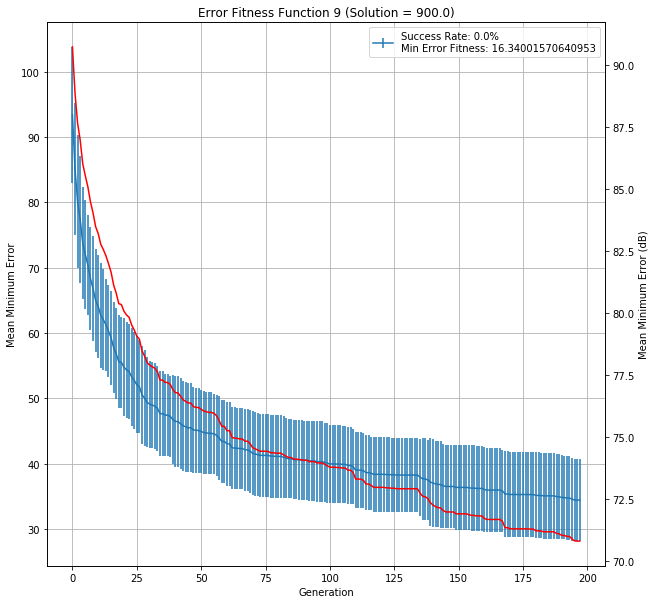

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
label = 'Success Rate: {}%\nMin Error Fitness: {}'.format(100*(successRate/float(numRuns)), arr_error.min())
ax.errorbar(np.arange(alg.generations), arr_error.mean(axis=0), yerr=arr_error.std(axis=0), label=label)
ax2 = ax.twinx()
ax2.plot(np.arange(alg.generations), 20*np.log(arr_error.mean(axis=0)), label='Mean Min Error (dB)', color='red')
ax2.set_ylabel('Mean Minimum Error (dB)')

ax.grid(True)
ax.set_ylabel('Mean Minimum Error')
ax.legend()
ax.set_xlabel('Generation')
ax.set_title('Error Fitness Function {} (Solution = {})'.format(funcId, solution))
plt.savefig(output_filepath + 'mean_error_evolution.jpeg', bbox_inches = 'tight')

In [11]:
df_sumup = pd.DataFrame(columns=['algorithm', '#Fc', 'D', 'percFES'] + ['run_' + str(i) for i in np.arange(1,numRuns+1,1)] + ['mean', 'elapsed_time', 'evals'])
df_sumup.loc[df_sumup.shape[0]] = [str(alg), funcId, dim, percMaxEvals] + arr_best_error + [np.mean(arr_best_error), progbar.get_elapsed_time(), alg.fitnessEvals]
print ('Saving df_sumup to ', output_filepath + 'df_sumup.tsv')
df_sumup.to_csv(output_filepath + 'df_sumup.tsv', sep='\t')
df_sumup

Saving df_sumup to 

./results/DE/best/1/bin/[9_10_51_300_0.6_0.5_False_None]df_sumup.tsv

,algorithm,#Fc,D,percFES,run_1,run_2,run_3,run_4,run_5,run_6,...,run_45,run_46,run_47,run_48,run_49,run_50,run_51,mean,elapsed_time,evals
0,DE/best/1/bin,9,10,0.6,40.542034,39.313899,34.582652,28.793053,36.329557,32.026083,...,21.153954,25.747728,30.925193,37.737688,41.661782,31.608975,32.105075,34.460572,4:08:06,60000
